In [1]:
# importing files
training_img = "/kaggle/input/dogs-vs-cats/train"
test_img = "/kaggle/input/dogs-vs-cats/test"

In [2]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras import Sequential
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#generators

training = keras.utils.image_dataset_from_directory(
    directory=training_img,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

validation = keras.utils.image_dataset_from_directory(
    directory=test_img,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalizing the data
def normalize_function(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_images = training.map(normalize_function)
validation_images = validation.map(normalize_function)

In [5]:
#lr mods
lr_scheduler = ReduceLROnPlateau(monitor="val_loss",
                                factor=0.5,
                                patience=3,
                                min_lr=1e-7) #(0.0000001)

In [6]:
# Creating the CNN model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Conv2D(256, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# model.add(Dense(64, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
# model.add(Dense(32, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
hist = model.fit(train_images,
                 epochs=10,
                 validation_data=validation_images,
                 callbacks=[lr_scheduler])

Epoch 1/10
625/625 [==============================] - 111s 158ms/step - loss: 0.6208 - accuracy: 0.6870 - val_loss: 0.6490 - val_accuracy: 0.6860 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 57s 91ms/step - loss: 0.4770 - accuracy: 0.7708 - val_loss: 0.5141 - val_accuracy: 0.7566 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.4062 - accuracy: 0.8127 - val_loss: 0.4385 - val_accuracy: 0.7970 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3573 - accuracy: 0.8406 - val_loss: 0.3925 - val_accuracy: 0.8212 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 50s 80ms/step - loss: 0.3042 - accuracy: 0.8683 - val_loss: 0.3665 - val_accuracy: 0.8410 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 51s 81ms/step - loss: 0.2449 - accuracy: 0.8975 - val_loss: 0.3290 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 7/10
625/625 [==============================] - 51

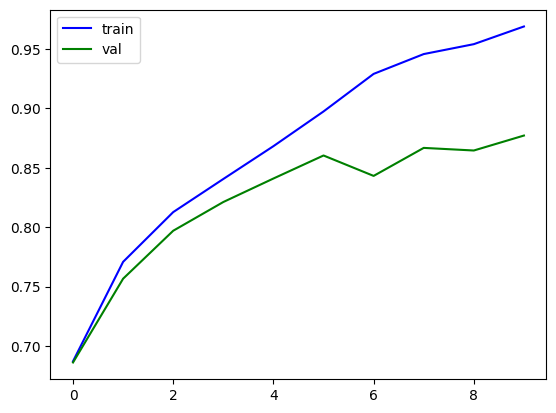

In [10]:
#comparing accuracy with val accuracy
plt.plot(hist.history["accuracy"], color="blue", label="train")
plt.plot(hist.history["val_accuracy"], color="green", label="val")
plt.legend()
plt.show()

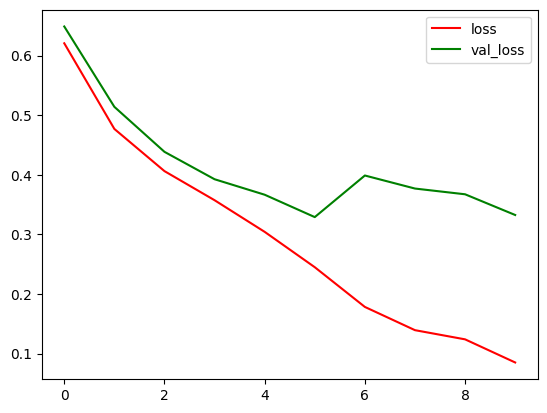

In [11]:
# loss vs val_loss
plt.plot(hist.history["loss"], color = "red", label="loss")
plt.plot(hist.history["val_loss"], color = "green", label="val_loss")
plt.legend()
plt.show()

In [12]:
#upload any image add link after image.jpg
!wget -O image1.jpg https://www.petfriendlyhouse.com/wp-content/uploads/2019/09/Beagle-medium-sized-dog-768x768.jpg

--2023-09-30 10:27:39--  https://www.petfriendlyhouse.com/wp-content/uploads/2019/09/Beagle-medium-sized-dog-768x768.jpg
Resolving www.petfriendlyhouse.com (www.petfriendlyhouse.com)... 162.159.136.54, 162.159.137.54
Connecting to www.petfriendlyhouse.com (www.petfriendlyhouse.com)|162.159.136.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98907 (97K) [image/jpeg]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>]  96.59K  --.-KB/s    in 0.009s  

2023-09-30 10:27:40 (10.0 MB/s) - ‘image1.jpg’ saved [98907/98907]



In [13]:
#reading the image we uploaded from link through cv2
import cv2
image1 = cv2.imread("image1.jpg")

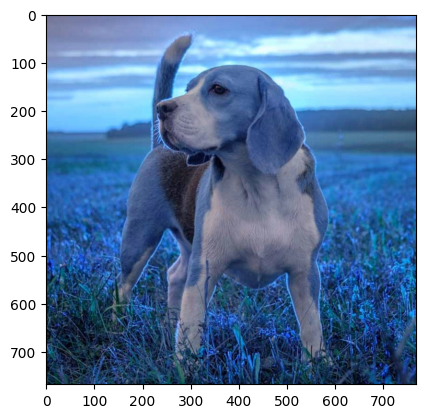

In [14]:
plt.imshow(image1)

In [15]:
#resizing the image
image1 = cv2.resize(image1, (256,256))

In [16]:
# providing the shape of the image
test_image1 = image1.reshape((1,256,256,3))

In [17]:
model.predict(test_image1)

1/1 [==============================] - 0s 230ms/step


array([[1.]], dtype=float32)

In [18]:
#prediction
def prediction(image):
    if model.predict(image) == [[0]]:
        print("cat")
    else:
        print("dog")
prediction(test_image1)

1/1 [==============================] - 0s 19ms/step
dog


# **Trying Through Transfer Learning**

In [19]:
from keras.applications.vgg16 import VGG16

base = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)


58889256/58889256 [==============================] - 0s 0us/step


In [20]:
base.trainable=False
# set_trainable=False

# #fine tuning last convolutional layer

# for layer in base.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

In [21]:
base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
#vgg model
modelvgg = Sequential()

modelvgg.add(base)
modelvgg.add(Flatten())

modelvgg.add(Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
modelvgg.add(Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
modelvgg.add(Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
modelvgg.add(Dense(1, activation="sigmoid"))

In [23]:
modelvgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 64)                16448     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23,122,113
Trainable params: 8,407,425
N

In [24]:
# using generators created above
# training = keras.utils.image_dataset_from_directory(
#     directory=training_img,
#     labels="inferred",
#     label_mode="int",
#     batch_size=32,
#     image_size=(256,256)
# )

# validation = keras.utils.image_dataset_from_directory(
#     directory=test_img,
#     labels="inferred",
#     label_mode="int",
#     batch_size=32,
#     image_size=(256,256)
# )

#data is also normalized in one of the previous cell

In [25]:
modelvgg.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [26]:
vgghist = modelvgg.fit(train_images,
                 epochs=10,
                 validation_data=validation_images,
                 callbacks=[lr_scheduler]
                      )

Epoch 1/10
625/625 [==============================] - 81s 122ms/step - loss: 0.9188 - accuracy: 0.8783 - val_loss: 24.4165 - val_accuracy: 0.8876 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 76s 121ms/step - loss: 0.4668 - accuracy: 0.8947 - val_loss: 9.0603 - val_accuracy: 0.9112 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3820 - accuracy: 0.9043 - val_loss: 7.9515 - val_accuracy: 0.9070 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 76s 121ms/step - loss: 0.3334 - accuracy: 0.9111 - val_loss: 12.5090 - val_accuracy: 0.9252 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3021 - accuracy: 0.9194 - val_loss: 22.4771 - val_accuracy: 0.9272 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2888 - accuracy: 0.9223 - val_loss: 8.2380 - val_accuracy: 0.9142 - lr: 0.0010
Epoch 7/10
625/625 [=============================

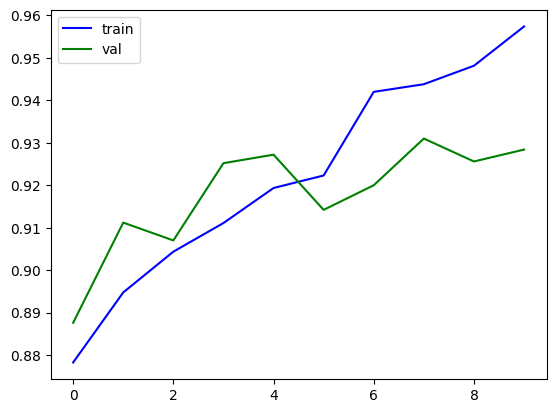

In [27]:
plt.plot(vgghist.history["accuracy"], color="blue", label="train")
plt.plot(vgghist.history["val_accuracy"], color="green", label="val")
plt.legend()
plt.show()

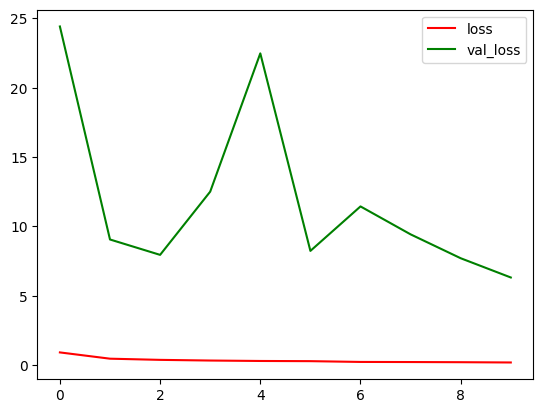

In [28]:
# loss vs val_loss
plt.plot(vgghist.history["loss"], color = "red", label="loss")
plt.plot(vgghist.history["val_loss"], color = "green", label="val_loss")
plt.legend()
plt.show()

In [29]:
def prediction_vgg(image):
    if modelvgg.predict(image) == [[0]]:
        print("cat")
    else:
        print("dog")

prediction_vgg(test_image1)
# prediction_vgg(test_image2)

1/1 [==============================] - 0s 393ms/step
dog
